# Project: Problem Statement - Credit Card Customer Segmentation


### Background: AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalised campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.

## Objective: To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.

In [1]:
#Key Questions:

#How many different segments of customers are there?
#How are these segments different from each other?
#What are your recommendations to the bank on how to better market to and service these customers?

### Data Description: Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call.

In [2]:
# Customer key - Identifier for the customer
# Average Credit Limit - Average credit limit across all the credit cards
# Total credit cards - Total number of credit cards
# Total visits bank - Total number of bank visits
# Total visits online - total number of online visits
# Total calls made - Total number of calls made by the customer

In [3]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer  
from IPython.display import Image  
#pip install pydotplus
#import pydotplus as pydot
from sklearn import tree
from os import system
from sklearn import metrics
#from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from yellowbrick.classifier import ClassificationReport, ROCAUC

plt.style.use('ggplot')
pd.options.display.float_format = '{:,.2f}'.format
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from IPython.display import Image 

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.utils import resample

import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from matplotlib import cm

import warnings
warnings.filterwarnings('ignore')

C:\Users\Vicente\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
bankdata = pd.read_excel (r'C:\Users\Vicente\Google Drive\Artificial Intelligence and Machine Learning\Unsupervised Learning\Project\Credit Card Customer Data.xlsx')

### Steps to follow: 

### 1) Perform univariate analysis on the data to better understand the variables at your disposal and to get an idea about the no of clusters. Perform EDA, create visualizations to explore data. (10 marks)

In [5]:
bankdata.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [6]:
bankdata.shape

(660, 7)

In [7]:
bankdata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.00,330.50,190.67,1.00,165.75,330.50,495.25,660.00
Customer Key,660.00,"55,141.44","25,627.77","11,265.00","33,825.25","53,874.50","77,202.50","99,843.00"
Avg_Credit_Limit,660.00,"34,574.24","37,625.49","3,000.00","10,000.00","18,000.00","48,000.00","200,000.00"
Total_Credit_Cards,660.00,4.71,2.17,1.00,3.00,5.00,6.00,10.00
Total_visits_bank,660.00,2.40,1.63,0.00,1.00,2.00,4.00,5.00
Total_visits_online,660.00,2.61,2.94,0.00,1.00,2.00,4.00,15.00
Total_calls_made,660.00,3.58,2.87,0.00,1.00,3.00,5.00,10.00


In [8]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [9]:
bankdata.corr()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,1.00,0.05,0.68,0.74,0.41,0.03,-0.68
Customer Key,0.05,1.00,0.07,-0.01,-0.00,0.02,0.01
Avg_Credit_Limit,0.68,0.07,1.00,0.61,-0.10,0.55,-0.41
Total_Credit_Cards,0.74,-0.01,0.61,1.00,0.32,0.17,-0.65
Total_visits_bank,0.41,-0.00,-0.10,0.32,1.00,-0.55,-0.51
Total_visits_online,0.03,0.02,0.55,0.17,-0.55,1.00,0.13
Total_calls_made,-0.68,0.01,-0.41,-0.65,-0.51,0.13,1.00


In [10]:
bankdata.isnull().values.any()

False

In [11]:
bankdata.isna().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [12]:
bankdata.nunique() 

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

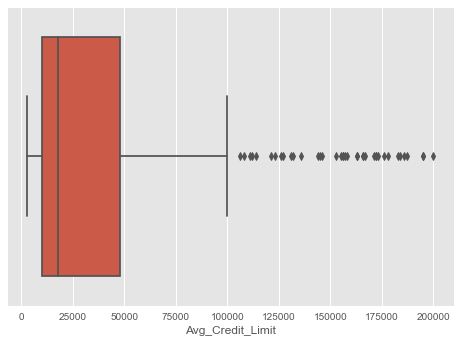

In [13]:
sns.boxplot(x=bankdata["Avg_Credit_Limit"])

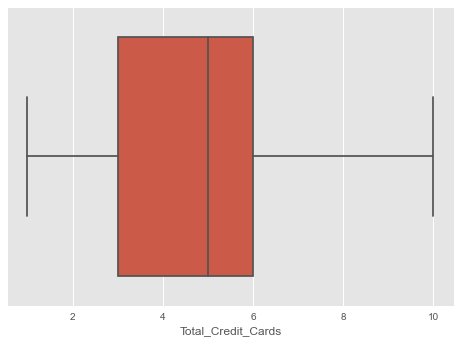

In [14]:
sns.boxplot(x=bankdata["Total_Credit_Cards"])

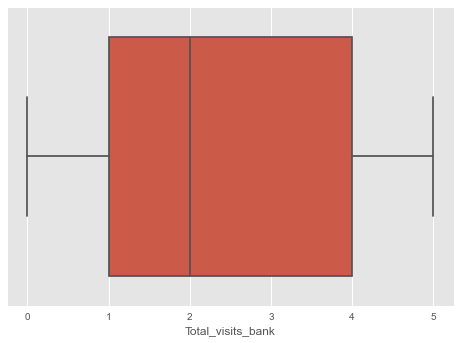

In [15]:
sns.boxplot(x=bankdata["Total_visits_bank"])

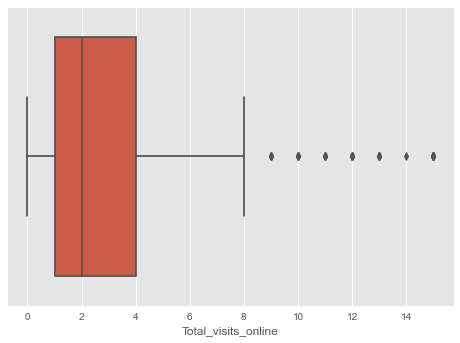

In [16]:
sns.boxplot(x=bankdata["Total_visits_online"])

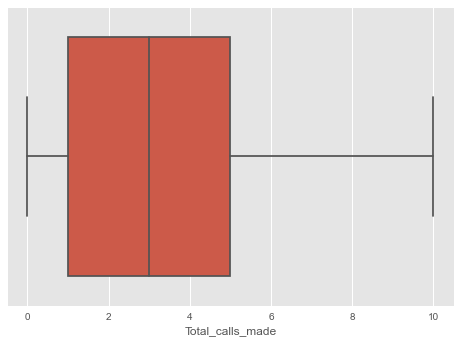

In [17]:
sns.boxplot(x=bankdata["Total_calls_made"])

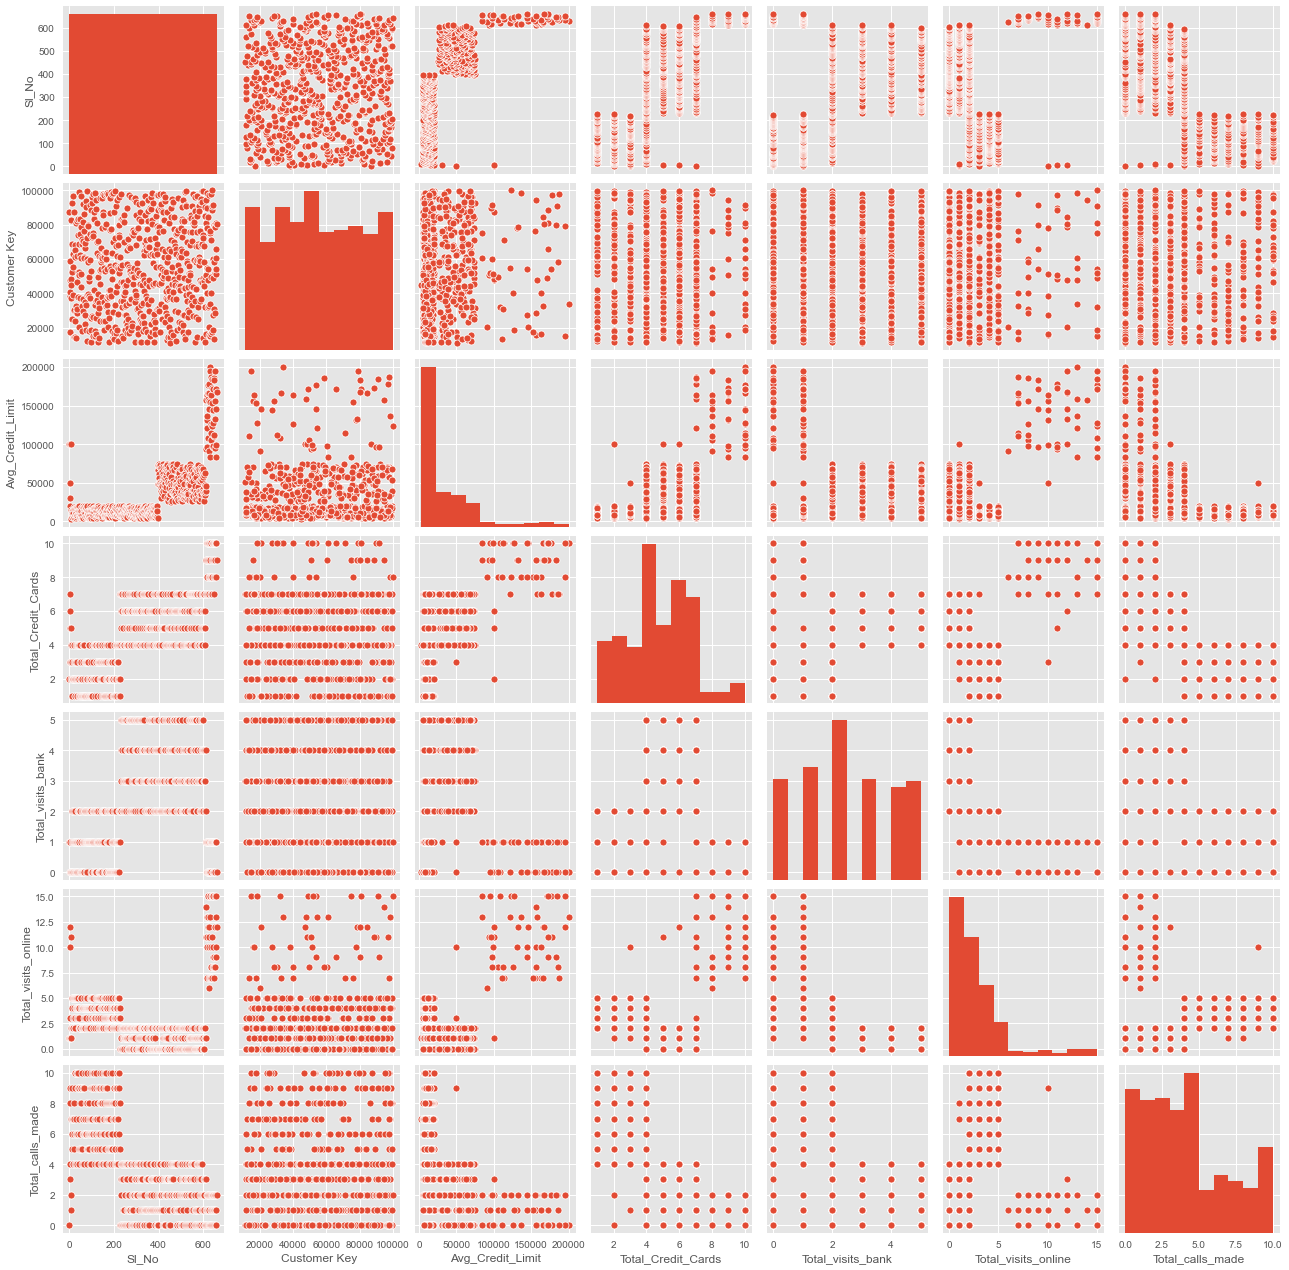

In [18]:
sns.pairplot(bankdata)

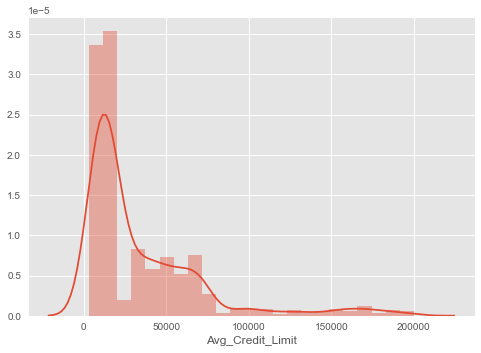

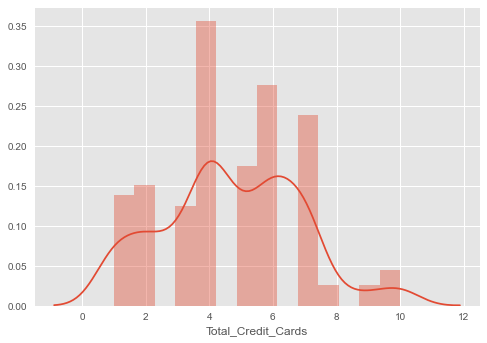

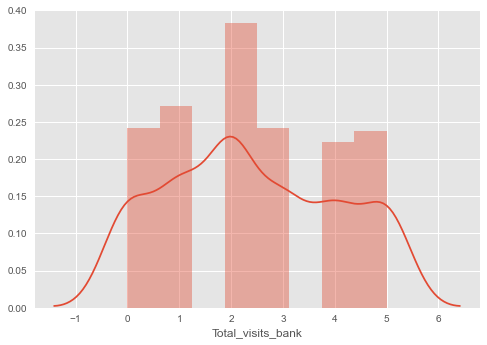

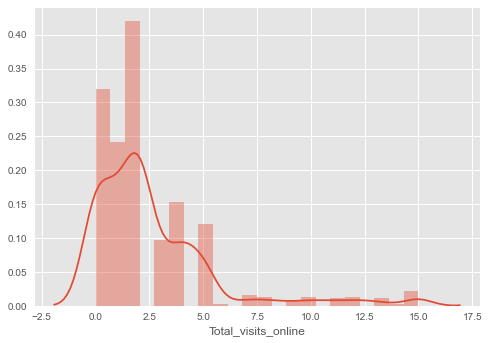

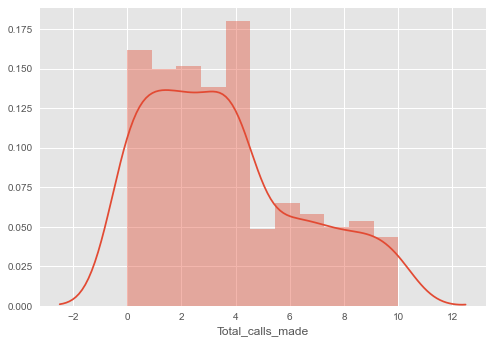

In [19]:
for i in ['Avg_Credit_Limit','Total_Credit_Cards','Total_visits_bank', 'Total_visits_online', 'Total_calls_made']:
    sns.distplot(bankdata[i])
    plt.show()

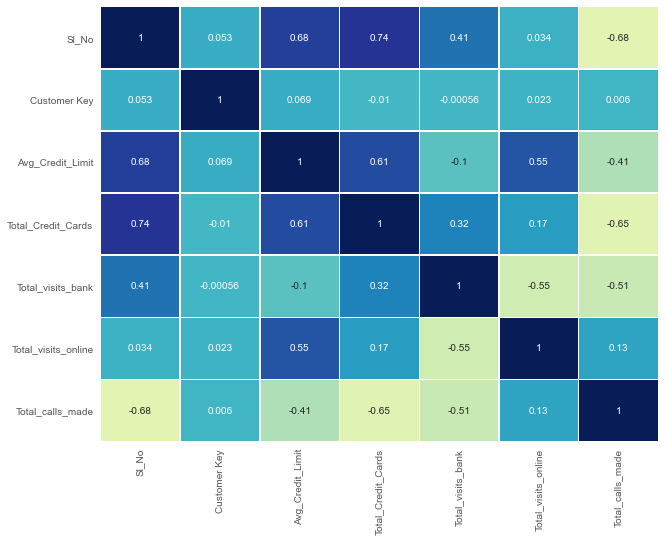

In [20]:
plt.figure(figsize=(10,8))

sns.heatmap(bankdata.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

plt.show()

In [21]:
bankdata_new1 = bankdata.drop(['Sl_No'], axis =1)
bankdata_new1.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,87073,100000,2,1,1,0
1,38414,50000,3,0,10,9
2,17341,50000,7,1,3,4
3,40496,30000,5,1,1,4
4,47437,100000,6,0,12,3


In [22]:
bankdata_new = bankdata_new1.drop(['Customer Key'], axis =1)
bankdata_new.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [23]:
bankdata_new.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


### 2) Properly comment on the codes, provide explanations of the steps taken in the notebook and conclude your insights from the graphs. (5 marks)

In [24]:
#Most customers have more than 1 credit card, at least 3 credit cards
#50% of customers have $18,000 in credit limit and below
#Average credit limit and number of credit cards have the highest correlation
#Average credit limit and visits online have the second highest correlation

#Based on the insights from the data customers who are more active using the online services have a higher credit limit 
#thus, to have a higher credit limit they need a higher number of credit cards

### 3) Execute K-means clustering use elbow plot and analyse clusters using boxplot (10 marks)

In [25]:
bankdata_new.dtypes
numeric_cols = bankdata_new.select_dtypes(include=[np.int64, np.float64]).columns
numeric_cols
bankdata_new[numeric_cols] =bankdata_new[numeric_cols].apply(zscore)

In [26]:
bankdata_new.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.74,-1.25,-0.86,-0.55,-1.25
1,0.41,-0.79,-1.47,2.52,1.89
2,0.41,1.06,-0.86,0.13,0.15
3,-0.12,0.14,-0.86,-0.55,0.15
4,1.74,0.60,-1.47,3.20,-0.20


In [27]:
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init = 5)
    clusters.fit(bankdata_new)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({"num_clusters": cluster_range, "cluster_errors": cluster_errors})
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,"3,300.00"
1,2,"2,040.99"
2,3,933.04
3,4,780.77
4,5,704.57
5,6,642.17
6,7,605.34
7,8,564.87
8,9,539.19
9,10,510.51


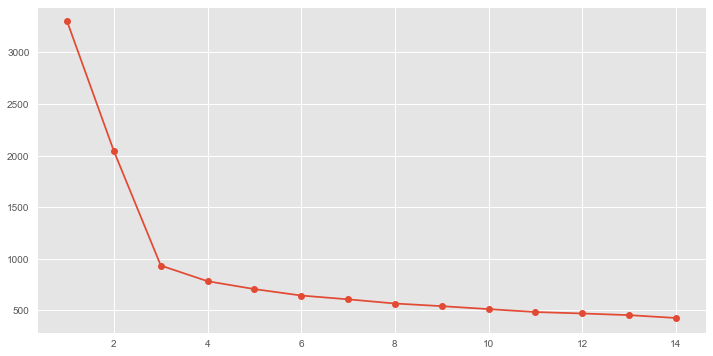

In [28]:
from matplotlib import cm

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

#Elbow inflection point for this data is at 5 clusters

In [29]:
kmeans = KMeans(n_clusters=5, n_init = 7, random_state=12345)
kmeans.fit(bankdata_new)

KMeans(n_clusters=5, n_init=7, random_state=12345)

In [30]:
# Check the amount of data in each cluster

labels = kmeans.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[101 196  50 123 190]


In [31]:
#Check the centers in each group
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(bankdata_new) )
centroid_df.transpose()

,0,1,2,3,4
Avg_Credit_Limit,-0.60,0.04,2.83,-0.59,-0.09
Total_Credit_Cards,-1.03,0.39,1.86,-1.08,0.36
Total_visits_bank,-0.86,0.06,-1.11,-0.94,1.30
Total_visits_online,0.29,-0.56,2.83,0.35,-0.54
Total_calls_made,0.50,-0.53,-0.87,1.68,-0.58


In [32]:
predictions = kmeans.predict(bankdata_new)
predictions
bankdata["group"] = predictions
bankdata['group'] = bankdata['group'].astype('category')
bankdata.dtypes

Sl_No                     int64
Customer Key              int64
Avg_Credit_Limit          int64
Total_Credit_Cards        int64
Total_visits_bank         int64
Total_visits_online       int64
Total_calls_made          int64
group                  category
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000210B2DEFBB0>,
      dtype=object)

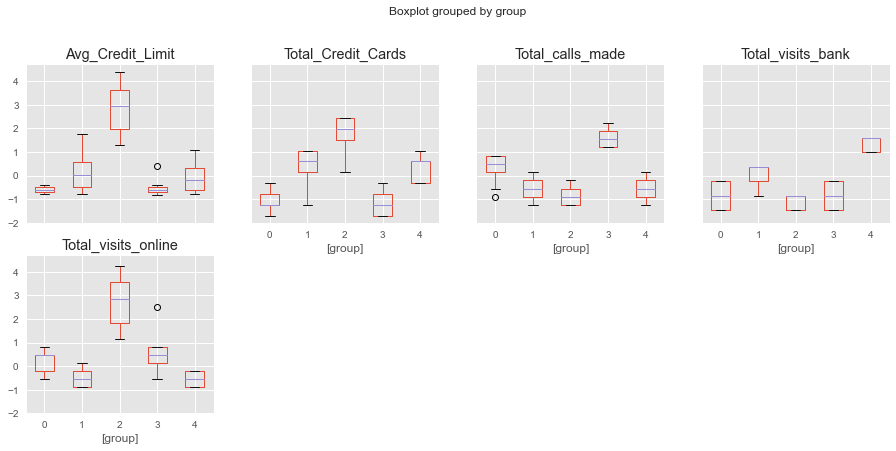

In [33]:
# Visualize the centers using boxplot

bankdata_new["group"] = predictions
bankdata_new.boxplot(by = 'group',  layout=(3,4), figsize=(15, 10))

### 4) Execute hierarchical clustering (with different linkages) with the help of dendrogram and cophenetic coeff. Analyse clusters formed using boxplot (15 marks)

In [34]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

In [35]:
from scipy.spatial.distance import pdist  

In [36]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(bankdata_new, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(bankdata_new))

c
#Best clustering method

0.904251459941459

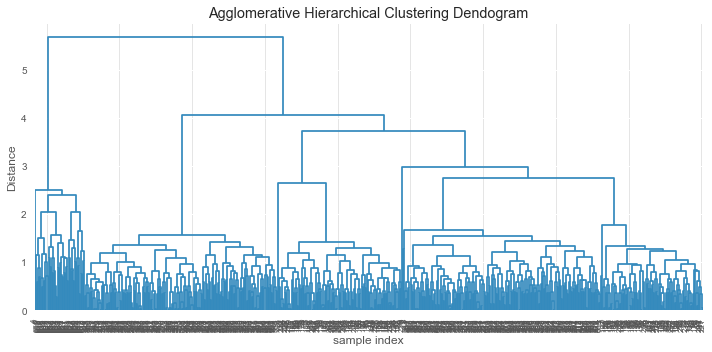

In [37]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

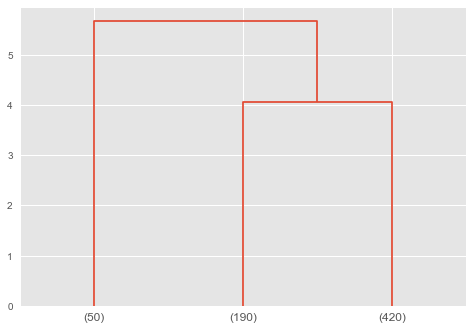

In [38]:
# Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

In [39]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z1 = linkage(bankdata_new, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z1 , pdist(bankdata_new))

c

0.8998803156815165

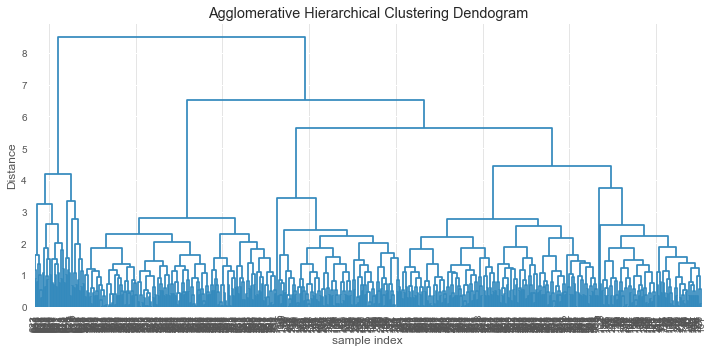

In [40]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z1, leaf_rotation=90.,color_threshold=90,  leaf_font_size=10. )
plt.tight_layout()

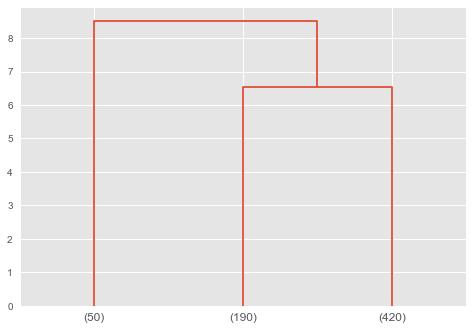

In [41]:
dendrogram(
    Z1,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

In [42]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z2 = linkage(bankdata_new, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z2 , pdist(bankdata_new))

c

0.8041460874598617

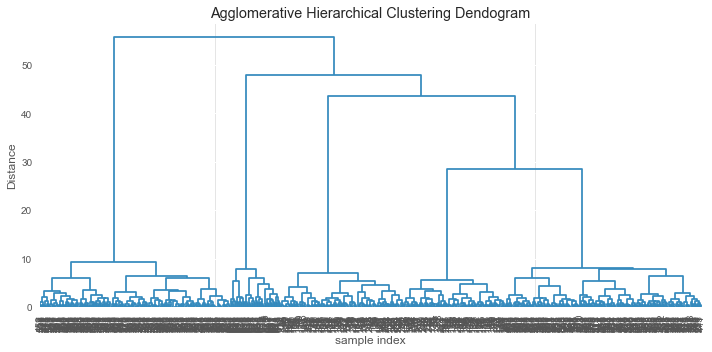

In [43]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z2, leaf_rotation=90.,color_threshold=600,  leaf_font_size=10. )
plt.tight_layout()

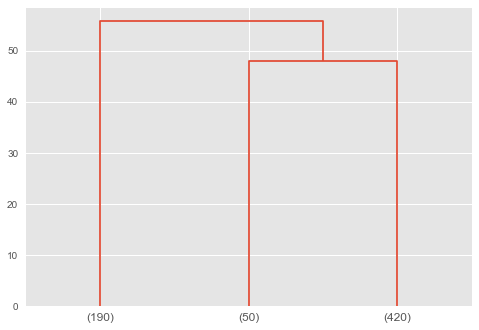

In [44]:
dendrogram(
    Z2,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

In [45]:
max_d = 4

In [46]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 2, 2, 2, 3, 3, 3, 2,
       3, 2, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 2, 3, 2, 2, 3, 2, 3,
       2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2,
       2, 3, 3, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2,

In [47]:
max_d1 = 6

In [48]:
clusters1 = fcluster(Z1, max_d1, criterion='distance')
clusters1

array([3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 2, 2, 2, 3, 3, 3, 2,
       3, 2, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 2, 3, 2, 2, 3, 2, 3,
       2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2,
       2, 3, 3, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2,

In [49]:
max_d2 = 40

In [50]:
clusters2 = fcluster(Z2, max_d2, criterion='distance')
clusters2

array([4, 3, 4, 4, 2, 3, 2, 4, 4, 3, 4, 3, 3, 4, 4, 3, 4, 4, 3, 3, 4, 3,
       4, 4, 3, 3, 3, 3, 4, 3, 4, 4, 3, 4, 3, 4, 3, 4, 3, 3, 3, 3, 4, 4,
       4, 3, 4, 4, 3, 4, 3, 4, 3, 3, 3, 4, 4, 3, 3, 3, 3, 3, 4, 4, 3, 4,
       4, 4, 3, 3, 3, 3, 4, 4, 3, 4, 4, 4, 3, 3, 3, 4, 4, 4, 4, 4, 3, 4,
       3, 3, 4, 3, 4, 3, 4, 3, 4, 4, 3, 4, 4, 3, 3, 3, 3, 3, 4, 4, 4, 3,
       4, 3, 3, 4, 4, 3, 3, 3, 4, 3, 4, 3, 4, 3, 3, 4, 3, 3, 4, 4, 4, 4,
       4, 3, 3, 4, 3, 3, 3, 3, 3, 4, 3, 4, 3, 4, 3, 4, 3, 3, 3, 4, 4, 4,
       3, 4, 3, 3, 3, 4, 3, 4, 4, 3, 3, 3, 3, 4, 3, 3, 3, 3, 4, 3, 3, 4,
       4, 3, 3, 4, 4, 3, 3, 3, 4, 4, 4, 3, 4, 4, 3, 4, 4, 3, 4, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 3, 3, 4, 4, 4, 3, 3, 3, 4, 4, 3, 3,
       3, 4, 3, 3, 3, 4, 3, 3, 4, 4, 1, 4, 1, 4, 1, 1, 1, 1, 4, 4, 4, 1,
       4, 1, 4, 4, 1, 4, 1, 1, 4, 4, 1, 4, 4, 1, 4, 1, 4, 1, 1, 4, 1, 4,
       1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 4, 1, 1, 1, 1, 1, 4, 4, 4, 4, 1,
       1, 4, 4, 1, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1,

In [51]:
#Boxplot for Euclidian/Average
cresult = clusters
clusters
bankdata_new["clusters"] = cresult
bankdata_new['clusters'] = bankdata_new['clusters'].astype('category')
bankdata_new.dtypes

Avg_Credit_Limit        float64
Total_Credit_Cards      float64
Total_visits_bank       float64
Total_visits_online     float64
Total_calls_made        float64
group                     int32
clusters               category
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000210B4C750D0>,
      dtype=object)

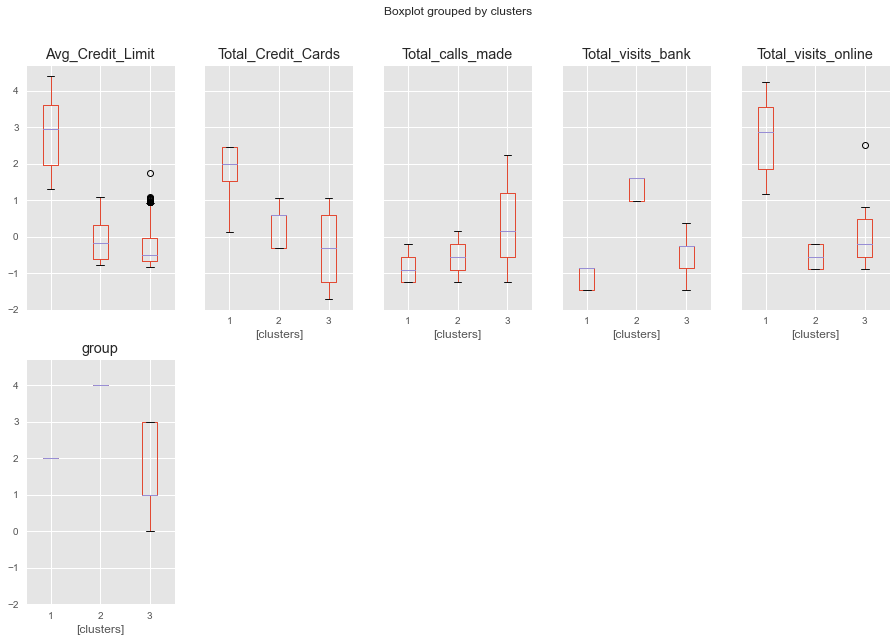

In [52]:
#Boxplot for Euclidian/Average
bankdata_new.boxplot(by="clusters", figsize=(15,10), layout=(2,5))

In [53]:
#Boxplot for Euclidian/Complete
cresult1 = clusters1
clusters1
bankdata_new["clusters1"] = cresult1
bankdata_new['clusters1'] = bankdata_new['clusters1'].astype('category')
bankdata_new.dtypes

Avg_Credit_Limit        float64
Total_Credit_Cards      float64
Total_visits_bank       float64
Total_visits_online     float64
Total_calls_made        float64
group                     int32
clusters               category
clusters1              category
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000210B4B563D0>,
      dtype=object)

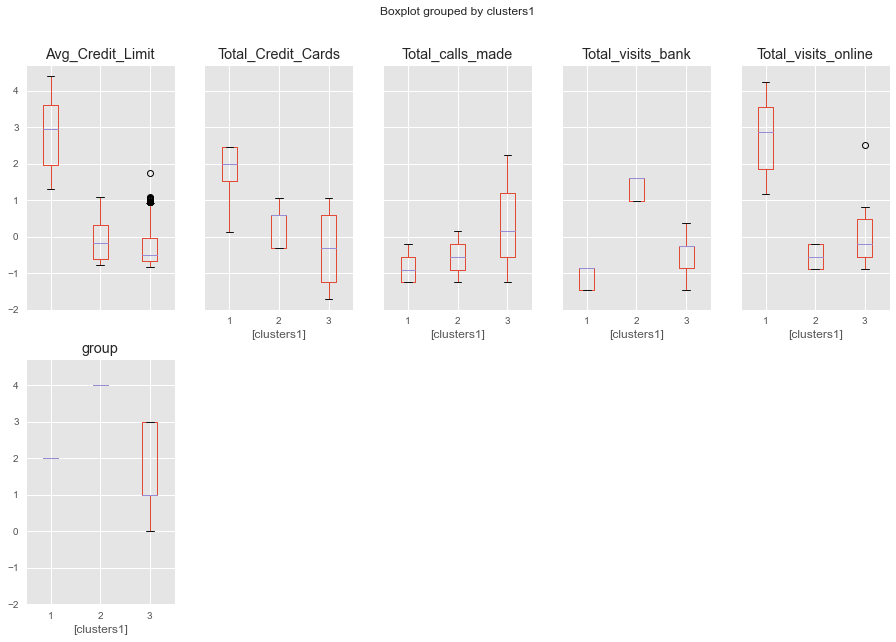

In [54]:
#Boxplot for Euclidian/Complete
bankdata_new.boxplot(by="clusters1", figsize=(15,10), layout=(2,5))

In [55]:
#Boxplot for Euclidian/Ward
cresult2 = clusters2
clusters2
bankdata_new["clusters2"] = cresult2
bankdata_new['clusters2'] = bankdata_new['clusters2'].astype('category')
bankdata_new.dtypes

Avg_Credit_Limit        float64
Total_Credit_Cards      float64
Total_visits_bank       float64
Total_visits_online     float64
Total_calls_made        float64
group                     int32
clusters               category
clusters1              category
clusters2              category
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000210B4B56850>,
      dtype=object)

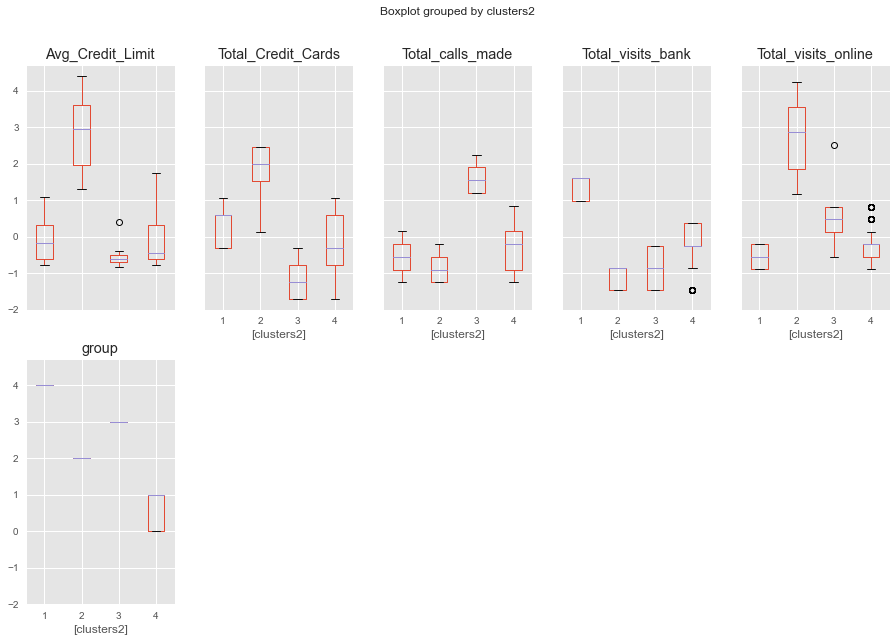

In [56]:
#Boxplot for Euclidian/Ward
bankdata_new.boxplot(by="clusters2", figsize=(15,10), layout=(2,5))

In [57]:
from sklearn.metrics import silhouette_score

### 5) Calculate average silhouette score for both methods. (5 marks)

In [58]:
# Calculate Avg Silhoutte Score for Kmeans Clustering

silhouette_score(bankdata_new,predictions)

0.60461674642182

In [59]:
# Calculate Avg Silhoutte Score for Euclidian/Average

from sklearn.metrics import silhouette_score
silhouette_score(bankdata_new,clusters)

0.555114405983084

In [60]:
# Calculate Avg Silhoutte Score for Euclidian/Complete

silhouette_score(bankdata_new,clusters1)

0.555114405983084

In [61]:
# Calculate Avg Silhoutte Score for Euclidian/Ward

silhouette_score(bankdata_new,clusters2)

0.5955357154429248

### 6) Compare K-means clusters with Hierarchical clusters. (5 marks)

In [62]:
#For Kmeans I decided the number of clusters based on the elbow in the graph which was 5 in this case. The Kmeans method
#yielded a much higher Slihoutte score when compared to hierarchichal clutering methods. 
#Hierarchichal culstering methods yielded much different results with lower Silhouette scores, the clusters created using 
#different hierarchical clustering methods did not cluster outliers efficiently when compared to Kmeans. 
#For this exercise I decided not to eliminate any of the outliers since they are still customers with much higher borrowing 
#power and still represent an important demographic for the bank

### 7) Analysis the clusters formed, tell us how is one cluster different from another and answer all the key questions. (10 marks)

In [63]:
#Key Questions:

#How many different segments of customers are there?
#Going by Kmeans clustering there are 5 segments of customers
#Going by Hierarchical clustering euclidian/averagge there are 3 clusters
#The method I would recommend would be to go with Kmeans and have 5 clusters

#How are these segments different from each other?
#These segements vary for example: Group 1 is consumers with the average credit limit, medium amount of credit cards, lower total calls made, 
#lower online visits and higher bank visits.
#Group 2 are consumers who have the highest average credit limit, highest amount of credit cards, lower total calls, lower bank visits and the highest amount of 
#online visits. This data also coincides with the clusters created for Euclidian/Average hierarchical clusters. 

#What are your recommendations to the bank on how to better market to and service these customers?
#based on the data most customers do not like to visit the bank in person with the exception of one cluster who tends to go more.
#Campaign should encourege customers to visit the bank to meet with their experts in order to find the best products for them. 